In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist

_, _, _, y_test = prepare_dataset_mnist()
reconstruction_error = np.load('SVHN_pipeline_weights_test_recon_error.npy')
del _

def boxplots_each_label(reconstruction_errors, labels_dataset):
    a = np.stack((labels_dataset,reconstruction_errors),axis=-1)
    
    df = pd.DataFrame(a)
    df.columns = ['Label', 'Reconstruction_error']
    df.index = np.arange(1, len(df)+1)
    df['Label'].astype(int)
    
    #data = pd.concat([df['SalePrice'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    
    fig = sb.boxplot(x='Label', y='Reconstruction_error', data=df)
    #fig = sb.stripplot(x='Label', y='Reconstruction_error', data=df, color="orange", jitter=0.2, size=2.5)
    
    fig.axis(ymin=0, ymax=reconstruction_errors[np.argmax(reconstruction_errors)]+reconstruction_errors[np.argmax(reconstruction_errors)]*0.1)

    plt.title("Boxplot with jitter", loc="left")

    
    return

boxplots_each_label(reconstruction_error, y_test)


Using TensorFlow backend.


(9959, 28, 28, 1)


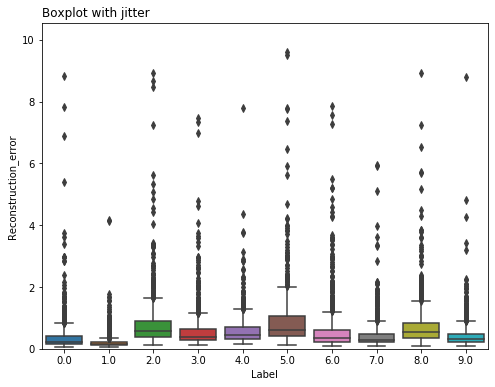

In [2]:
outliers = []
for i in range(len(reconstruction_error)):
    if reconstruction_error[i] < 10:
        outliers.append(i)

import numpy as np
from visualizing_images import visualize_images #does pyplot and makes a grid of data

#Data unpacking block
from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist

X_train, X_test, y_train, y_test = prepare_dataset_mnist()
reconstructed_images = np.load('SVHN_pipeline_weights_test_reconstructed_images.npy')


relevant_x_test = []
relevant_reconstructed = []
relevant_recon_y = []
relevant_errors = []
for i in outliers:
    relevant_x_test.append(X_test[i])
    relevant_reconstructed.append(reconstructed_images[i])
    relevant_recon_y.append(y_test[i])
    relevant_errors.append(reconstruction_error[i])
    
relevant_x_test = np.array(relevant_x_test)
relevant_reconstructed = np.array(relevant_reconstructed)
relevant_recon_y = np.array(relevant_recon_y)
relevant_errors = np.array(relevant_errors)
print(relevant_x_test.shape)
    
#print(visualize_images(relevant_x_test, relevant_recon_y, 1))
#print(visualize_images(relevant_reconstructed, relevant_recon_y, 1))
boxplots_each_label(relevant_errors, relevant_recon_y)
    

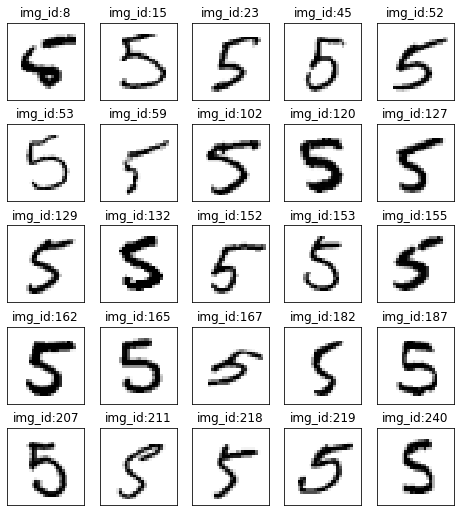

None


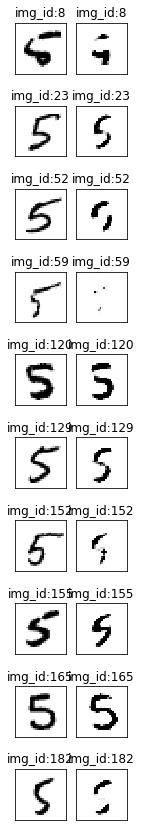

None


In [6]:
#Visualize X_train, X_test or reconstructed images. Necessary format = (N,width,height)
from visualizing_images import visualize_images, visualize_images_comparison #does pyplot and makes a grid of data

print(visualize_images(X_test, y_test, 5))
print(visualize_images_comparison(X_test, reconstructed_images, y_test, 5))


In [ ]:
def average_recon_error_label(reconstruction_errors, labels_dataset):
    reconstruction_errors_labels = np.stack([y_test,reconstruction_errors],axis=-1)
    unique_elements = np.unique(reconstruction_errors_labels[:,0])
    
    idx = []
    for i in unique_elements:
        indexes = []
        for element in reconstruction_errors_labels:
            if element[0] == i:
                indexes.append(element[1])
        indexes = np.array(indexes)
        idx.append(indexes)
    idx = np.array(idx)
    
    average_error_label = np.around(np.array([np.mean(a) for a in idx]), decimals = 4)
    print(average_error_label)

    return average_error_label

errors = average_recon_error_label(reconstruction_error, y_test)
    


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def barcharts(average_errors1, average_errors2):
    labels = np.arange(10)
    MNIST = average_errors1
    Fashion_MNIST = average_errors2
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, MNIST, width, label='MNIST')
    rects2 = ax.bar(x + width/2, Fashion_MNIST, width, label='Fashion_MNIST')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Recon_error')
    ax.set_title('VAE - Reconstruction errors per dataset and label')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = np.around(rect.get_height(), decimals=4)
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    
    autolabel(rects1)
    autolabel(rects2)
    
    fig.tight_layout()
    
    plt.show()
    
    return

barcharts(errors, errors+errors*0.2)

In [ ]:
for i in outliers:
    print(i)
    


In [ ]:
#todo 

make dataframe to load all reconstruction errors into. 